In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_explore import viz
# fname = '../data/SOCATv2024-1d_005deg-colloc-r20250224/SOCATv2024_1d_005deg_collocated_2015-r20250224.pq'
# fname = '../data/SOCATv2024_1d_raw/SOCATv2024v_collocated-SODA_only-2010.pq'
year = 2010
# fname_interp_socat = f'../data/SOCATv2024-track_interp-collocated-1982_2021/socat2024-interp_tracks-collocated-{year}.pq'
fname_interp_socat = f'../data/SOCATv2024_interpolated2/.gridded_2d_ocean_data_for_ML/SOCATv2024-cruise_tracks_interp-collocated/socat2024-interp_tracks-collocated-{year}.pq'
df_interp_socat = pd.read_parquet(fname_interp_socat)
df_interp_socat.set_index(['expocode', 'time_1d', 'lat', 'lon'], inplace=True)
# df_interp_socat.columns
df_interp_socat = df_interp_socat.groupby(level=[0,1,2,3]).mean()
df_interp_socat.columns, 


(Index(['interpolated', 'time', 'chl_globcolour', 'chl_globcolour_uncert',
        'chl_globcolour_flags', 'time_chlgc', 'lat_chlgc', 'lon_chlgc',
        'temp_soda', 'salt_soda', 'mld_dens_soda', 'lon_soda', 'lat_soda',
        'depth_soda', 'time_soda', 'ssh_adt', 'ssh_sla', 'lat_sshcm',
        'lon_sshcm', 'time_sshcm', 'sst_cci', 'sst_cci_uncertainty', 'ice_cci',
        'time_sstcci', 'lat_sstcci', 'lon_sstcci', 'sss_cci',
        'sss_cci_random_error', 'lat_ssscci', 'lon_ssscci', 'time_ssscci'],
       dtype='object'),)

In [2]:
print("Number of cruises in year", year, ":", df_interp_socat.index.unique(level=0).size)

Number of cruises in year 2010 : 252


In [3]:
df_interp_socat.head()

interpolated  \
expocode     time_1d    lat        lon                        
06AQ20091129 2010-01-01 -55.508867 203.896700           1.0   
                        -55.486333 203.923300           1.0   
                        -54.868583 204.776467           1.0   
                        -54.843567 204.810833           1.0   
                        -54.818550 204.845200           1.0   

                                                                       time  \
expocode     time_1d    lat        lon                                        
06AQ20091129 2010-01-01 -55.508867 203.896700 2010-01-01 09:49:57.333333248   
                        -55.486333 203.923300 2010-01-01 09:30:02.666666752   
                        -54.868583 204.776467 2010-01-01 05:11:32.333333248   
                        -54.843567 204.810833 2010-01-01 05:01:34.666666752   
                        -54.818550 204.845200 2010-01-01 04:51:37.000000000   

                                               chl_globcolour  \
expocode     time_1d    lat        lon                          
06AQ20091129 2010-01-01 -55.508867 203.896700        0.243971   
                        -55.486333 203.923300        0.235469   
                        -54.868583 204.776467        0.261544   
                        -54.843567 204.810833        0.263728   
                        -54.818550 204.845200        0.271248   

                                               chl_globcolour_uncert  \
expocode     time_1d    lat        lon                                 
06AQ20091129 2010-01-01 -55.508867 203.896700              33.299999   
                        -55.486333 203.923300              33.469997   
                        -54.868583 204.776467              32.649998   
                        -54.843567 204.810833              32.610001   
                        -54.818550 204.845200              32.439999   

                                               chl_globcolour_flags  \
expocode     time_1d    lat        lon                                
06AQ20091129 2010-01-01 -55.508867 203.896700                   0.0   
                        -55.486333 203.923300                   0.0   
                        -54.868583 204.776467                   0.0   
                        -54.843567 204.810833                   0.0   
                        -54.818550 204.845200                   0.0   

                                              time_chlgc  lat_chlgc  \
expocode     time_1d    lat        lon                                
06AQ20091129 2010-01-01 -55.508867 203.896700 2010-01-01 -55.520836   
                        -55.486333 203.923300 2010-01-01 -55.479172   
                        -54.868583 204.776467 2010-01-01 -54.854172   
                        -54.843567 204.810833 2010-01-01 -54.854172   
                        -54.818550 204.845200 2010-01-01 -54.812504   

                                                lon_chlgc  temp_soda  \
expocode     time_1d    lat        lon                                 
06AQ20091129 2010-01-01 -55.508867 203.896700  203.895828   5.870886   
                        -55.486333 203.923300  203.937500   6.063562   
                        -54.868583 204.776467  204.770828   7.425827   
                        -54.843567 204.810833  204.812500   7.425827   
                        -54.818550 204.845200  204.854172   7.425827   

                                               salt_soda  ...  \
expocode     time_1d    lat        lon                    ...   
06AQ20091129 2010-01-01 -55.508867 203.896700  33.831806  ...   
                        -55.486333 203.923300  33.852020  ...   
                        -54.868583 204.776467  33.877071  ...   
                        -54.843567 204.810833  33.877071  ...   
                        -54.818550 204.845200  33.877071  ...   

                                               sst_cci_uncertainty  ice_cci  \
expocode     time_1d    lat        lon                

In [4]:
# fname_interp = f'../data/interpolated_points/interpolated_{year}'
# df_interp = pd.read_parquet(fname_interp)
# df_interp.head(5)
# dupix = df_interp[df_interp.index.duplicated(keep=False)]
# dupix

In [5]:
# df_merged = df_interp_socat.merge(df_interp, left_index=True, right_index=True)
# df_merged.drop(['interpolated_x'], axis=1, inplace=True)
# df_merged.rename(columns={'interpolated_y': 'interpolated'}, inplace=True)
# df_merged.shape, df_interp.shape, df_interp_socat.shape

In [6]:
# df_merged.head()
# df_merged.columns.size

In [7]:
fname_socat = f'../data/SOCATv2024_raw-collocated-1982_2021/SOCATv2024_raw_r20250307-1982_2021/SOCATv2024v_collocated-{year}.pq'
df_socat = pd.read_parquet(fname_socat)
df_socat['time_1d'] = df_socat['time'].dt.round('D')
df_socat.set_index(['expocode', 'time_1d','lat', 'lon'], inplace=True)
# df_socat = df_socat.groupby(level=[0,1,2,3]).mean()
df_socat['interpolated'] = False
# assert df_socat.index.is_unique
df_socat.head()

sal  sst_deg_c  pppp_hpa  \
expocode     time_1d    lat      lon                                     
06AQ20091129 2010-01-01 -54.3970 205.4190  33.859      7.799     981.0   
                        -54.3967 205.4189  33.861      7.788     981.0   
                        -54.3964 205.4188  33.862      7.777     981.0   
                        -54.3961 205.4186  33.864      7.767     981.0   
                        -54.3958 205.4185  33.865      7.756     981.0   

                                           woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat      lon                               
06AQ20091129 2010-01-01 -54.3970 205.4190   34.074         978.1   
                        -54.3967 205.4189   34.074         978.1   
                        -54.3964 205.4188   34.074         978.1   
                        -54.3961 205.4186   34.074         978.1   
                        -54.3958 205.4185   34.074         978.1   

                                           dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat      lon                                       
06AQ20091129 2010-01-01 -54.3970 205.4190           1000.0       336.676   
                        -54.3967 205.4189           1000.0       336.263   
                        -54.3964 205.4188           1000.0       335.964   
                        -54.3961 205.4186           1000.0       335.150   
                        -54.3958 205.4185           1000.0       335.392   

                                           fco2rec_flag                time  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190             2 2010-01-01 00:33:17   
                        -54.3967 205.4189             2 2010-01-01 00:34:34   
                        -54.3964 205.4188             2 2010-01-01 00:35:50   
                        -54.3961 205.4186             2 2010-01-01 00:37:06   
                        -54.3958 205.4185             2 2010-01-01 00:38:22   

                                           year  ...  ice_cci  time_sstcci  \
expocode     time_1d    lat      lon             ...                         
06AQ20091129 2010-01-01 -54.3970 205.4190  2010  ...      0.0   2010-01-01   
                        -54.3967 205.4189  2010  ...      0.0   2010-01-01   
                        -54.3964 205.4188  2010  ...      0.0   2010-01-01   
                        -54.3961 205.4186  2010  ...      0.0   2010-01-01   
                        -54.3958 205.4185  2010  ...      0.0   2010-01-01   

                                           lat_sstcci  lon_sstcci  sss_cci  \
expocode     time_1d    lat      lon                                         
06AQ20091129 2010-01-01 -54.3970 205.4190     -54.375  205.425003      NaN   
                        -54.3967 205.4189     -54.375  205.425003      NaN   
                        -54.3964 205.4188     -54.375  205.425003      NaN   
                        -54.3961 205.4186     -54.375  205.425003      NaN   
                        -54.3958 205.4185     -54.375  205.425003      NaN   

                                           sss_cci_random_error  lat_ssscci  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190                   NaN         NaN   
                        -54.3967 205.4189                   NaN         NaN   
                        -54.3964 205.4188                   NaN         NaN   
                        -54.3961 205.4186                   NaN         NaN   
                        -54.3958 205.4185                   NaN         NaN   

                                           lon_ssscci  time_ssscci  \
expocode     time_1d    lat      lon                                 
06AQ20091129 2010-01-01 -54.3970 205.4190         NaN          NaT   
                        -54.3967 205.4189         NaN          NaT   
                        -54.3964 20

In [8]:
df = pd.concat([df_socat, df_interp_socat], axis=0)
print(df.shape, df_interp_socat.shape, df_socat.shape)
# df.head()
df.columns

(1504677, 40) (192229, 31) (1312448, 40)


Index(['sal', 'sst_deg_c', 'pppp_hpa', 'woa_sss', 'ncep_slp_hpa',
       'dist_to_land_km', 'fco2rec_uatm', 'fco2rec_flag', 'time', 'year',
       'chl_globcolour', 'chl_globcolour_uncert', 'chl_globcolour_flags',
       'time_chlgc', 'lat_chlgc', 'lon_chlgc', 'temp_soda', 'salt_soda',
       'mld_dens_soda', 'lon_soda', 'lat_soda', 'depth_soda', 'time_soda',
       'ssh_adt', 'ssh_sla', 'lat_sshcm', 'lon_sshcm', 'time_sshcm', 'sst_cci',
       'sst_cci_uncertainty', 'ice_cci', 'time_sstcci', 'lat_sstcci',
       'lon_sstcci', 'sss_cci', 'sss_cci_random_error', 'lat_ssscci',
       'lon_ssscci', 'time_ssscci', 'interpolated'],
      dtype='object')

In [9]:
df.loc[df.interpolated.astype(bool)].head()

sal  sst_deg_c  pppp_hpa  \
expocode     time_1d    lat        lon                                    
06AQ20091129 2010-01-01 -55.508867 203.896700  NaN        NaN       NaN   
                        -55.486333 203.923300  NaN        NaN       NaN   
                        -54.868583 204.776467  NaN        NaN       NaN   
                        -54.843567 204.810833  NaN        NaN       NaN   
                        -54.818550 204.845200  NaN        NaN       NaN   

                                               woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat        lon                                 
06AQ20091129 2010-01-01 -55.508867 203.896700      NaN           NaN   
                        -55.486333 203.923300      NaN           NaN   
                        -54.868583 204.776467      NaN           NaN   
                        -54.843567 204.810833      NaN           NaN   
                        -54.818550 204.845200      NaN           NaN   

                                               dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat        lon                                         
06AQ20091129 2010-01-01 -55.508867 203.896700              NaN           NaN   
                        -55.486333 203.923300              NaN           NaN   
                        -54.868583 204.776467              NaN           NaN   
                        -54.843567 204.810833              NaN           NaN   
                        -54.818550 204.845200              NaN           NaN   

                                               fco2rec_flag  \
expocode     time_1d    lat        lon                        
06AQ20091129 2010-01-01 -55.508867 203.896700           NaN   
                        -55.486333 203.923300           NaN   
                        -54.868583 204.776467           NaN   
                        -54.843567 204.810833           NaN   
                        -54.818550 204.845200           NaN   

                                                                       time  \
expocode     time_1d    lat        lon                                        
06AQ20091129 2010-01-01 -55.508867 203.896700 2010-01-01 09:49:57.333333248   
                        -55.486333 203.923300 2010-01-01 09:30:02.666666752   
                        -54.868583 204.776467 2010-01-01 05:11:32.333333248   
                        -54.843567 204.810833 2010-01-01 05:01:34.666666752   
                        -54.818550 204.845200 2010-01-01 04:51:37.000000000   

                                               year  ...  ice_cci  \
expocode     time_1d    lat        lon               ...            
06AQ20091129 2010-01-01 -55.508867 203.896700   NaN  ...      0.0   
                        -55.486333 203.923300   NaN  ...      0.0   
                        -54.868583 204.776467   NaN  ...      0.0   
                        -54.843567 204.810833   NaN  ...      0.0   
                        -54.818550 204.845200   NaN  ...      0.0   

                                               time_sstcci  lat_sstcci  \
expocode     time_1d    lat        lon                                   
06AQ20091129 2010-01-01 -55.508867 203.896700   2010-01-01  -55.525002   
                        -55.486333 203.923300   2010-01-01  -55.474998   
                        -54.868583 204.776467   2010-01-01  -54.875000   
                        -54.843567 204.810833   2010-01-01  -54.825001   
                        -54.818550 204.845200   2010-01-01  -54.825001   

                                               lon_sstcci  sss_cci  \
expocode     time_1d    lat        lon                               
06AQ20091129 2010-01-01 -55.508867 203.896700  203.875000      NaN   
                        -55.486333 203.923300  203.925003      NaN   
                        -54.868583 204.776467  204.774994      NaN   
                        -54.843567 204.810833  204.824997      NaN   
                        -54.818550 2

In [10]:
print("Number of cruises in year", year, ":", df.index.unique(level=0).size)

Number of cruises in year 2010 : 315


In [11]:
from fco2dataset.ucruise import divide_cruise

NUM_BINS = 64
WINDOW_LEN = 5


df2 = df.groupby(level=0, group_keys=False).apply(
    lambda cruise: divide_cruise(
        cruise,
        num_windows=NUM_BINS,
        len_window=WINDOW_LEN,
        max_time_delta=pd.Timedelta(days=2)
        ))
df2.head()

sal  sst_deg_c  pppp_hpa  \
expocode     time_1d    lat      lon                                     
06AQ20091129 2010-01-01 -54.3970 205.4190  33.859      7.799     981.0   
                        -54.3967 205.4189  33.861      7.788     981.0   
                        -54.3964 205.4188  33.862      7.777     981.0   
                        -54.3961 205.4186  33.864      7.767     981.0   
                        -54.3958 205.4185  33.865      7.756     981.0   

                                           woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat      lon                               
06AQ20091129 2010-01-01 -54.3970 205.4190   34.074         978.1   
                        -54.3967 205.4189   34.074         978.1   
                        -54.3964 205.4188   34.074         978.1   
                        -54.3961 205.4186   34.074         978.1   
                        -54.3958 205.4185   34.074         978.1   

                                           dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat      lon                                       
06AQ20091129 2010-01-01 -54.3970 205.4190           1000.0       336.676   
                        -54.3967 205.4189           1000.0       336.263   
                        -54.3964 205.4188           1000.0       335.964   
                        -54.3961 205.4186           1000.0       335.150   
                        -54.3958 205.4185           1000.0       335.392   

                                           fco2rec_flag                time  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190           2.0 2010-01-01 00:33:17   
                        -54.3967 205.4189           2.0 2010-01-01 00:34:34   
                        -54.3964 205.4188           2.0 2010-01-01 00:35:50   
                        -54.3961 205.4186           2.0 2010-01-01 00:37:06   
                        -54.3958 205.4185           2.0 2010-01-01 00:38:22   

                                             year  ...  lat_sstcci  \
expocode     time_1d    lat      lon               ...               
06AQ20091129 2010-01-01 -54.3970 205.4190  2010.0  ...     -54.375   
                        -54.3967 205.4189  2010.0  ...     -54.375   
                        -54.3964 205.4188  2010.0  ...     -54.375   
                        -54.3961 205.4186  2010.0  ...     -54.375   
                        -54.3958 205.4185  2010.0  ...     -54.375   

                                           lon_sstcci  sss_cci  \
expocode     time_1d    lat      lon                             
06AQ20091129 2010-01-01 -54.3970 205.4190  205.425003      NaN   
                        -54.3967 205.4189  205.425003      NaN   
                        -54.3964 205.4188  205.425003      NaN   
                        -54.3961 205.4186  205.425003      NaN   
                        -54.3958 205.4185  205.425003      NaN   

                                          sss_cci_random_error  lat_ssscci  \
expocode     time_1d    lat      lon                                         
06AQ20091129 2010-01-01 -54.3970 205.4190                  NaN         NaN   
                        -54.3967 205.4189                  NaN         NaN   
                        -54.3964 205.4188                  NaN         NaN   
                        -54.3961 205.4186                  NaN         NaN   
                        -54.3958 205.4185                  NaN         NaN   

                                           lon_ssscci  time_ssscci  \
expocode     time_1d    lat      lon                                 
06AQ20091129 2010-01-01 -54.3970 205.4190         NaN          NaT   
                        -54.3967 205.4189         NaN          NaT   
                        -54.3964 205.4188         NaN          NaT   
                        -54.3961 205.4186         NaN          NaT   
                        -54.3958 205.4185 

In [12]:
print(f"number of segments in year {year}:", df2.groupby([pd.Grouper(level=0), 'segment_id']).size())

number of segments in year 2010: expocode      segment_id
06AQ20091129  0              855
              1              615
              2             1093
              3              903
              4             1067
                            ... 
PAT520101221  21             155
              22             154
              23             158
              24             154
              25              45
Length: 4915, dtype: int64


In [13]:
expocodes = df.index.get_level_values(0).unique()
cruise_id = expocodes[7]#'49UF20100414'#
print(f"cruise_id: {cruise_id}")

cruise = df2.loc[cruise_id]
map = viz.plot_cruise_interactive_scatter_map(cruise.segment_id, #** ((srt_cruise.segment_id % 2 == 0) * 100), # some dumb trick to get hard color changes
                                              cmap='viridis',
                                              lat_name='lat',
                                              lon_name='lon',
                                              time_name='time_1d') 
map

cruise_id: 06ZG20100226


In [14]:
date = pd.to_datetime("01-01-2010").round('D')
date

Timestamp('2010-01-01 00:00:00')

In [15]:
date.year * 10000 + date.month * 100 + date.day

20100101

In [16]:
# create example dataframe with a datetime column
mydf = pd.DataFrame({'date': [pd.to_datetime('2010-01-01'), pd.to_datetime('2023-02-01'), pd.to_datetime('2023-03-01')]})
# convert datetime to integer format YYYYMMDD
mydf['time_feat'] = mydf['date'].round('D').dt.year * 10000 + mydf['date'].round('D').dt.month * 100 + mydf['date'].round('D').dt.day 
mydf['time_feat'].values

array([20100101, 20230201, 20230301], dtype=int32)

In [17]:
from fco2dataset.ucruise import df_to_numpy

predictors = ['sst_cci', 'sss_cci', 'pppp_hpa', 'woa_sss', 'ncep_slp_hpa', 'dist_to_land_km', 
              'chl_globcolour', 'temp_soda', 'salt_soda', 'mld_dens_soda', 
              'ssh_adt', 'ssh_sla', 'ice_cci', 'time_feat']
TIME_COL = 'time'
# round time columns to daily resolution and convert to int for numpy
df2['time_feat'] = df2[TIME_COL].round('D').dt.year * 10000 + df2[TIME_COL].round('D').dt.month * 100 + df2[TIME_COL].round('D').dt.day
# df2['time_feat'] = df2['time_feat'].astype(np.int32)
ds, expomap = df_to_numpy(df2, NUM_BINS, predictors)

time_feat:  expocode      time_1d     lat       lon     
06AQ20091129  2010-01-01  -54.3970  205.4190    20100101
                          -54.3967  205.4189    20100101
                          -54.3964  205.4188    20100101
                          -54.3961  205.4186    20100101
                          -54.3958  205.4185    20100101
Name: time_feat, dtype: int32
time:  expocode      time_1d     lat       lon     
06AQ20091129  2010-01-01  -54.3970  205.4190   2010-01-01 00:33:17
                          -54.3967  205.4189   2010-01-01 00:34:34
                          -54.3964  205.4188   2010-01-01 00:35:50
                          -54.3961  205.4186   2010-01-01 00:37:06
                          -54.3958  205.4185   2010-01-01 00:38:22
Name: time, dtype: datetime64[ns]
time_feat binned:  expocode      segment_id  bin_id
06AQ20091129  0           0         20100101.0
                          1         20100101.0
                          2         20100101.0
              

In [22]:
ds.shape

(15, 4915, 65)

In [23]:
import numpy as np
df2['time_feat'].values[:64].astype(np.float64), ds[14,0,:]

(array([20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101., 20100101., 20100101.,
        20100101., 20100101., 20100101., 20100101.]),
 array([101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
        101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
        101., 101., 101., 101., 101., 101., 101., 101., 10

In [24]:
print(ds[14, 0:5, :10])

[[101.         101.         101.         101.         101.
  101.         101.         101.         101.         101.        ]
 [101.         101.6        102.         102.         102.
  102.         102.         102.         102.         102.        ]
 [102.         102.         102.         102.         102.
  102.         102.         102.         102.         102.        ]
 [103.         103.         103.         103.         103.
  103.93333333 104.         104.         104.         104.        ]
 [104.         104.         104.         104.         104.
  104.         104.         104.         104.         104.        ]]


In [21]:
# remove year from time_feat
ds[14,:,:] = ds[14,:,:] % 10000
print(ds[14,0,0:10])

[101. 101. 101. 101. 101. 101. 101. 101. 101. 101.]


number of segments for 06ZG20100226:  29


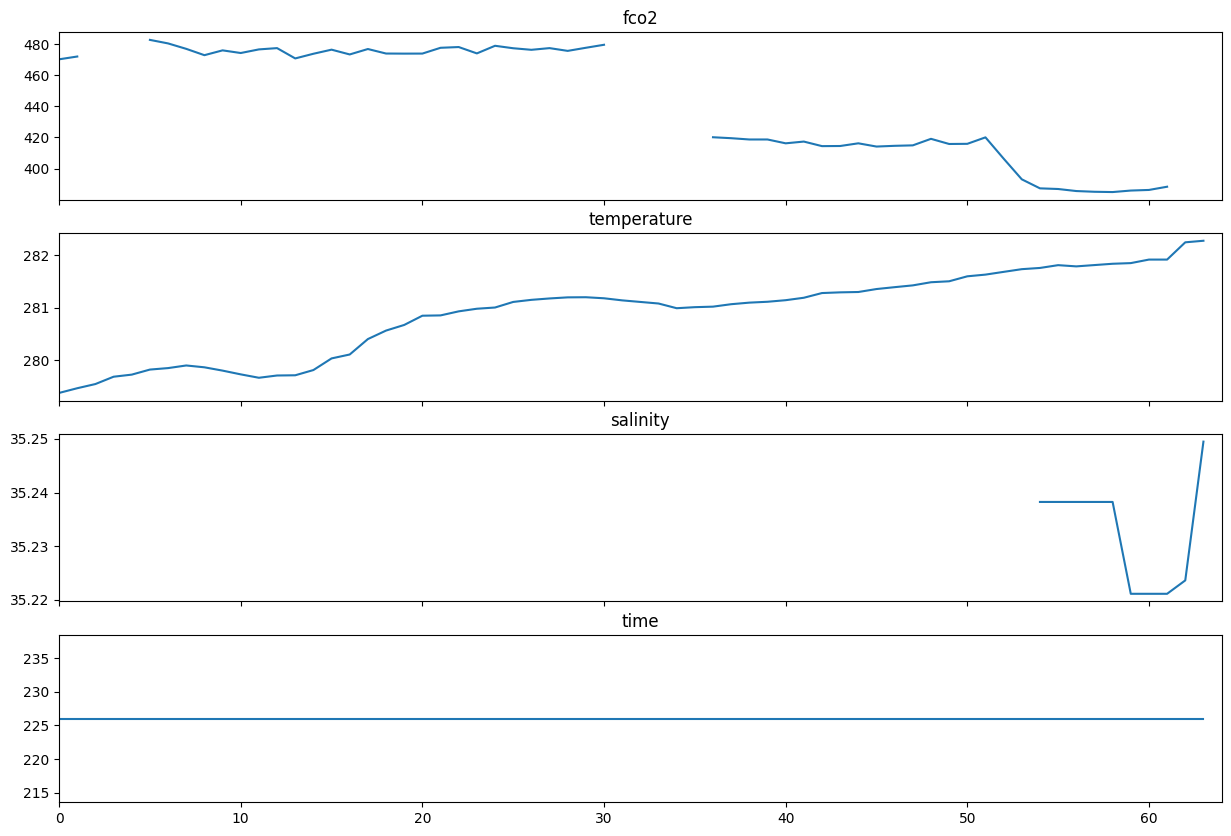

In [25]:
ixs = expomap.loc[cruise_id, :].values.flatten()
print(f"number of segments for {cruise_id}: ", ixs.shape[0])
fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
seg_ix = 0
ix = ixs[seg_ix]

plt.xlim((0, NUM_BINS))
titles = ['fco2', 'temperature', 'salinity', 'time']
for (i,j) in enumerate([0,1,2,14]):
    axs[i].plot(ds[j, ix])
    axs[i].set_title(titles[i])
plt.show()

In [46]:
import numpy as np
print(ds[0, ix])
cruise_binned = cruise[cruise['segment_id'] == seg_ix].groupby('bin_id').mean()

print(cruise_binned.fco2rec_uatm.values)
print(cruise[cruise['segment_id'] == seg_ix][['bin_id', 'fco2rec_uatm']])

np.allclose(ds[0, ix], cruise_binned.fco2rec_uatm.values, equal_nan=True)

[306.803   311.1455  323.82056 331.33078 336.16922 335.93567 338.66156
 340.3779  363.34473 377.29596 366.4782  343.75134 337.01355 337.0123
 337.71588 332.61032 329.271         nan       nan       nan       nan
 270.01877 268.49716 267.1215  267.8797  268.52237 281.78424 297.69458
 311.23093 320.97568 328.45547 322.64108 320.3969  317.99823 319.78537
 322.96426       nan       nan       nan 317.6522  311.33145 300.67877
 305.64883 317.72577 311.69556 299.39676 308.188   311.73184 309.343
 311.793   309.07285 307.65085 306.9959        nan       nan       nan
 293.9429  290.67886 291.776   295.36285 300.3517  300.153   298.40607
 300.42755 298.16357]
[306.803      311.1455     323.82055556 331.33077778 336.16922222
 335.93566667 338.66155556 340.37788889 363.34472727 377.29595349
 366.4782     343.75133333 337.01355556 337.0123     337.71588889
 332.61033333 329.271               nan          nan          nan
          nan 270.01877778 268.49716667 267.1215     267.87969231
 268.5223846

True

dataset shape:  (5330, 65)
total number of entries:  346450
fraction of valid observations:  0.8640150093808631
fraction of segments without any nans:  0.6270168855534709


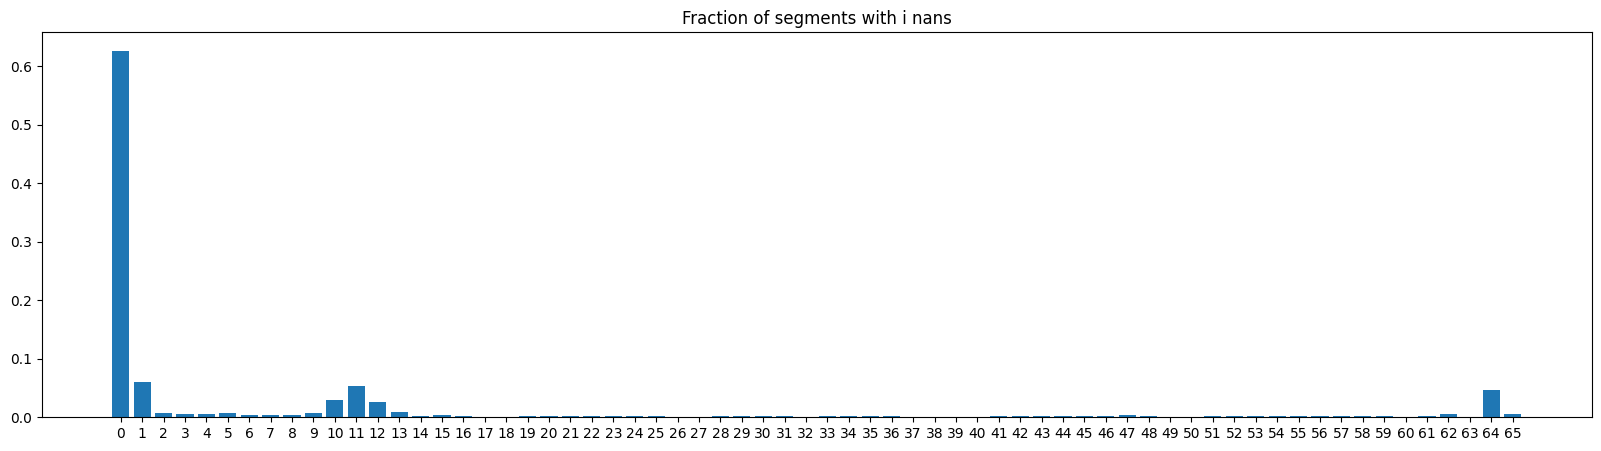

In [25]:
from ucruise import ds_nanstats
ds_nanstats(ds[1])

tryng to see if the files interpolated and allocated dataset is stored correctly in both npy and pq format + trying to understand why if I use the pq file in train1d.ipynb I get that fco2rec contains segments with all Nans, which is not possible. Result: still not clear, probably something weird happening with reshape. However not very important since reshaped datasets are equal. There are only conflicts if y is reshaped separately

In [63]:

import numpy as np
# read the numpy array
npds = np.load('../data/training_data/trainds_100km.npy')
print(ds.shape)
npy = npds[0]
print(npy.shape)

predictors = ['fco2rec_uatm', 'sst_cci', 'sss_cci', 'pppp_hpa', 'woa_sss', 'ncep_slp_hpa', 'dist_to_land_km', 
              'chl_globcolour', 'temp_soda', 'salt_soda', 'mld_dens_soda', 
              'ssh_adt', 'ssh_sla', 'ice_cci']
col_map = dict(zip(predictors, range(len(predictors))))

(14, 117337, 65)
(117337, 65)


In [64]:
# ESA-CCI > SODA 
# merge salt_soda and sss_cci, where sss_cci has priority, use salt_soda where sss_cci is nan
# salt_soda = ds[col_map['salt_soda']]
# sss_cci = ds[col_map['sss_cci']]
# mask = np.isnan(sss_cci)
# ds[2, mask] = salt_soda[np.isnan(sss_cci)]

In [65]:
# def filter_nans(ds, y, predictors, col_map):
#     """
#     Filter out samples where any of the predictors contains nans
#     """
#     X = ds[[col_map[p] for p in predictors]]
#     # keep samples where all predictors are not nan
#     not_nan_mask = np.isnan(X).any(axis=2)
#     not_nan_mask = np.sum(not_nan_mask, axis=0) == 0
#     print("Number of samples after filtering: ", np.sum(not_nan_mask))
#     return X[:, not_nan_mask, :], y[not_nan_mask, :]

In [ ]:
import pandas as pd

df = pd.read_parquet('../data/training_data/traindf_100km.pq')
col_map = dict(zip(df.columns, range(len(df.columns))))
num_bins = df.index.get_level_values('bin').unique().shape[0]
num_segments = df.index.get_level_values('segment').unique().shape[0]
ds = df.values.reshape(len(df.columns), num_segments, num_bins)
y = df.fco2rec_uatm.values.reshape(num_segments, num_bins)
# ds = ds[:, :, :-1]
# y = y[:, :-1]
# X, y = filter_nans(ds, y, ['sst_cci', 'sss_cci', 'chl_globcolour'], col_map)
# X.shape, y.shape
print(ds.shape, y.shape)

(14, 117337, 65) (117337, 65)


In [73]:
np.allclose(ds, npds, equal_nan=True)

True

In [75]:
np.allclose(y, npy, equal_nan=True)
# y[0, :10], npy[0, :10]

True

In [76]:
df.fco2rec_uatm.values.shape

(7626905,)

In [77]:
df.values.shape

(7626905, 14)